# Logistic Regression

This statistical method is used for binary classification tasks (despite regression being in the name!), in addition to the perceptron. The main difference for logistic regression is that the data its analyzing is not easily linearly separable, like it would be with the perceptorn. As such, instead of predicting whether or not an input belongs to one category or the other, we predict the probability that the instance belongs to a particular category. 

<p align="center">
    <img src="logistic regression.jpg" width="500">
</p>

Similar to the methods we've learned previously, logistic regression takes in a linear combination of the weights, inputs, and bias, denotd $z$.So we thus have: z is the linear combination of the inputs and weights. So, $z= w_1x_1 + w_2x_2+....w_nx_n + b$. The sigmoid function predicts a probability, denoted $\hat{y}$. 

$z$ is then passed into the Sigmoid function. Logistic regression uses the Sigmoid Function to map the inputs to a value between 0 and 1. This is how it looks like: 

$\sigma(z) = \frac{1}{1 + e^{-z}}$


The output of this function represents the probability of the target variable belonging to one of the classes. The function itself takes on a S-shape. The relationship is modeled by a Bernoulli distribution: 


$
    P(y_i | x_i) = \begin{cases}
    \hat{y_i} & \text{if }  y_i =1 \\
    1-\hat{y_i}  & \text{if } y_i = 0 
\end{cases}$



In order to train te model, we define a cost function. Commonly, we use the Binary Cross Entropy Function: 

$J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i))$

In order to minimize this cost value, we use stochastic gradient descent again! This means updating each instance with a learning rate/step size, $\alpha$:

$\theta_j = \theta_j - \alpha\frac{d}{d\theta_j}J(\theta)$

There also exists multinomial and ordinal logistic regresison types, but we focus on binary classification for our single-neuron model.





# Application

[Heart Attack Dataset Source](https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility)

The heart attack dataset is a collection of patient identities with general health information to predict whether or not they are susceptible to heart attacks.

There are 14 variables: 
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack


In this notebook, we will be predicting if someone will be at more risk of a heart attack based on two factors: age and maximum heart rate. You will notice that the correlation between these two factors is a bit weak, but we will continue for the sake of experiment.


In [256]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix


sns.set_theme()


df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\heart.csv")
df= df.dropna()

#I'm so sorry for these ominous variable names, but they were the most concise names :')
live = df[df.target == 0]
die = df[df.target == 1]


Let's visualize our data! We will also compress it such that if one is likely to get a heart attack, they are assigned the value 1, and if not, they are assigned the value 0.

Length of live.thalach: 499
Length of die.thalach: 526


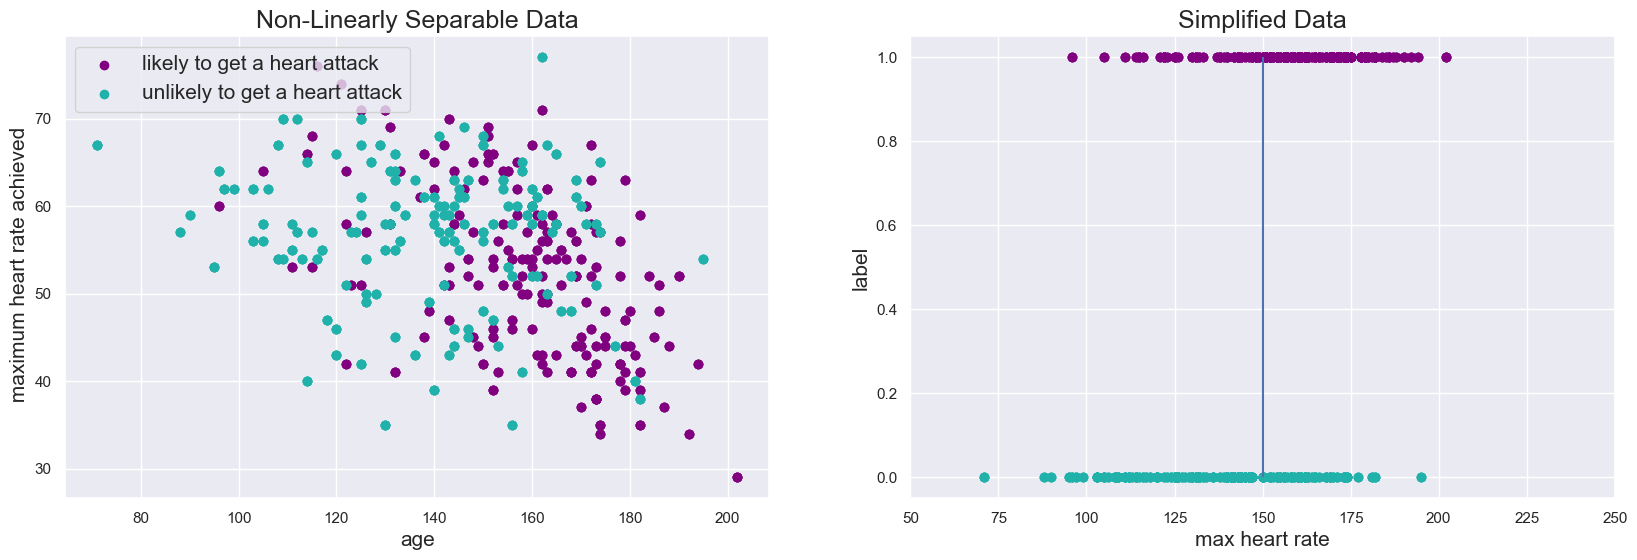

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))


#Plot visualizations
ax1.scatter(die.thalach, 
            die.age, 
            color = "purple", 
            label = "likely to get a heart attack")
ax1.scatter(live.thalach, 
            live.age, 
            color = "lightseagreen", 
            label = "unlikely to get a heart attack")
ax1.set_xlabel("age", fontsize = 15)
ax1.set_ylabel(" maximum heart rate achieved", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)


ax2.set_xlim((50,250))
ax2.scatter(die.thalach, 
            np.ones(526), 
            color = "purple", 
            label = "likely to get a heart attack")
ax2.scatter(live.thalach, 
            np.zeros(499), 
            color = "lightseagreen", 
            label = "unlikely to get a heart attack")
ax2.vlines(150, 0.0, 1)
ax2.set_xlabel("max heart rate", fontsize = 15)
ax2.set_ylabel("label", fontsize = 15)
ax2.set_title("Simplified Data", fontsize = 18)


print("Length of live.thalach:", len(live.thalach))
print("Length of die.thalach:", len(die.thalach))

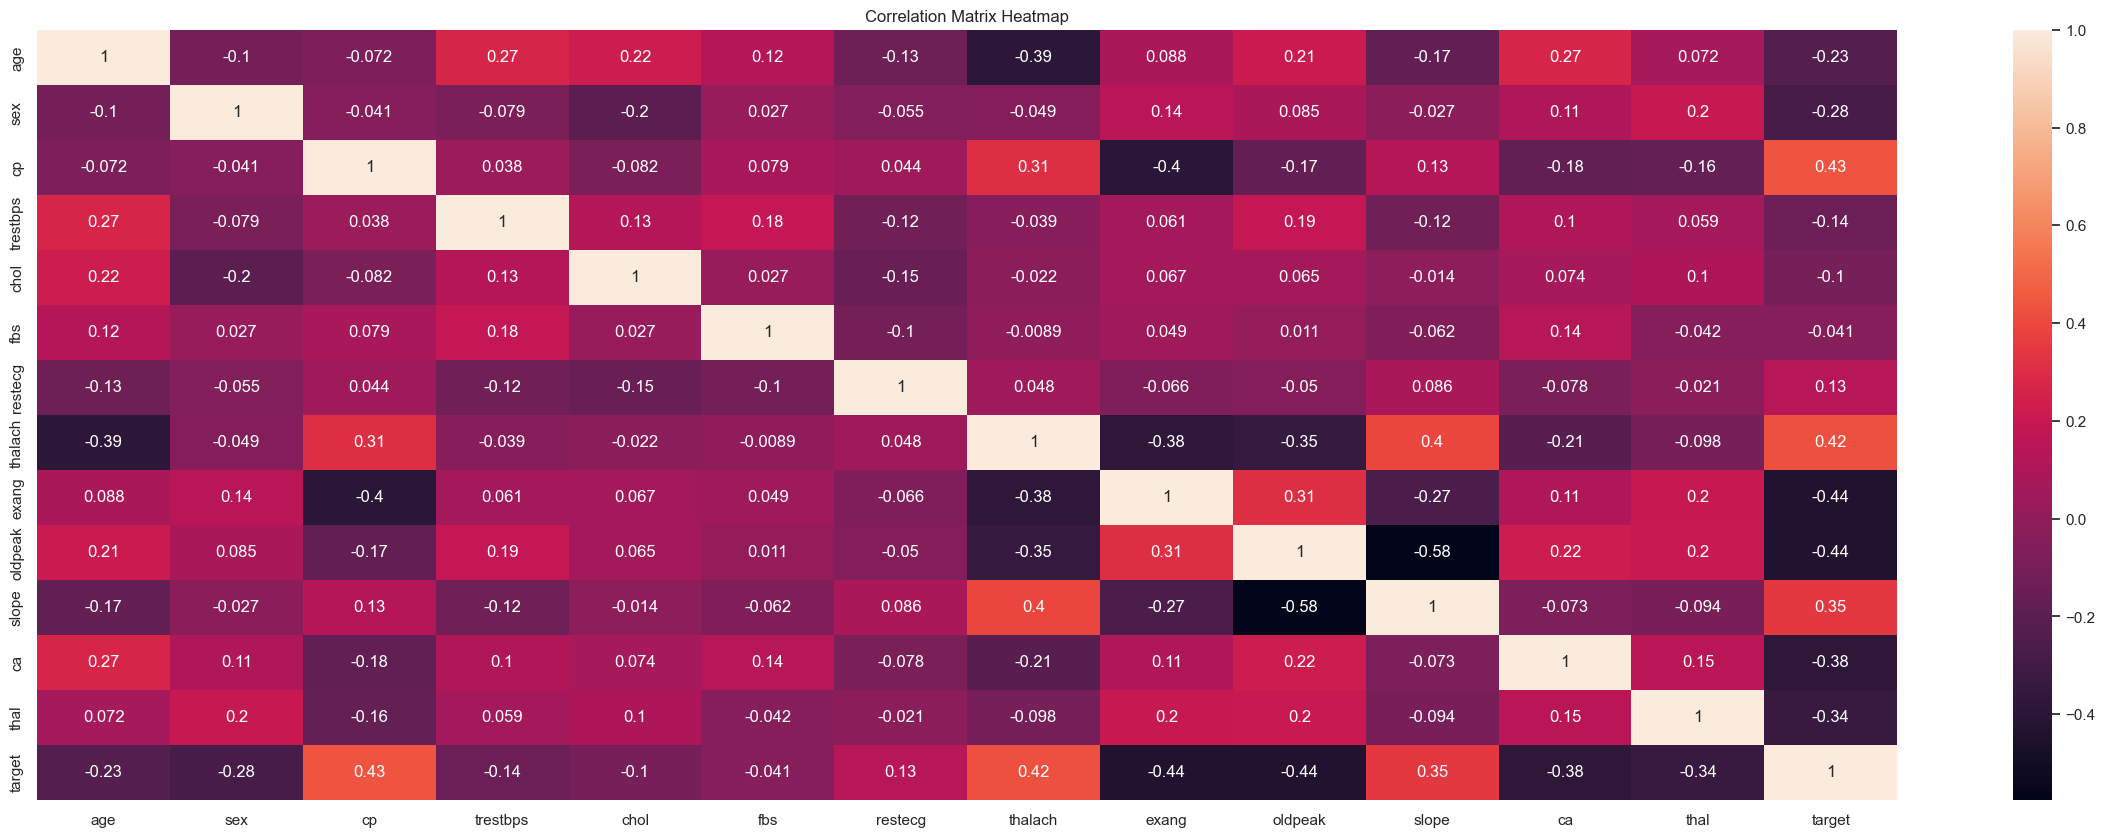

In [258]:
plt.figure(figsize = (30, 10))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

This is BARELY linear, but some negative correlation does exist, as seen through the heat map! There is so much overlap that using the Perceptron wouldn't be ideal. However, we notice that a relationship, though small, does exist, and we can use logistic regression to predict probabilities. So, live= 1, die= 0. 

Next, we define our main functions: the sigmoid function and the binary cross entropy loss function.

In [259]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    epsilon = 1e-10  # Some datapoints get to close to 0, so we need these two lines to check for that
    y_hat_clipped = np.clip(y_hat, epsilon, 1 - epsilon)
    return - y*np.log(y_hat_clipped) - (1 - y)*np.log(1 - y_hat_clipped)

Then, we train the model. We import our SingleNeuron class! (One of the benefits of creating separate packages for code that is reused often :))

In [260]:
from sklearn.model_selection import train_test_split
import single_neuron as node

In [261]:

model = node.SingleNeuron(sigmoid, cross_entropy_loss)

X = df.thalach.values 
X = X.reshape(-1, 1)
y = np.where(df.target == 1, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.train(X_train, y_train, alpha = 0.0005, epochs = 1000)


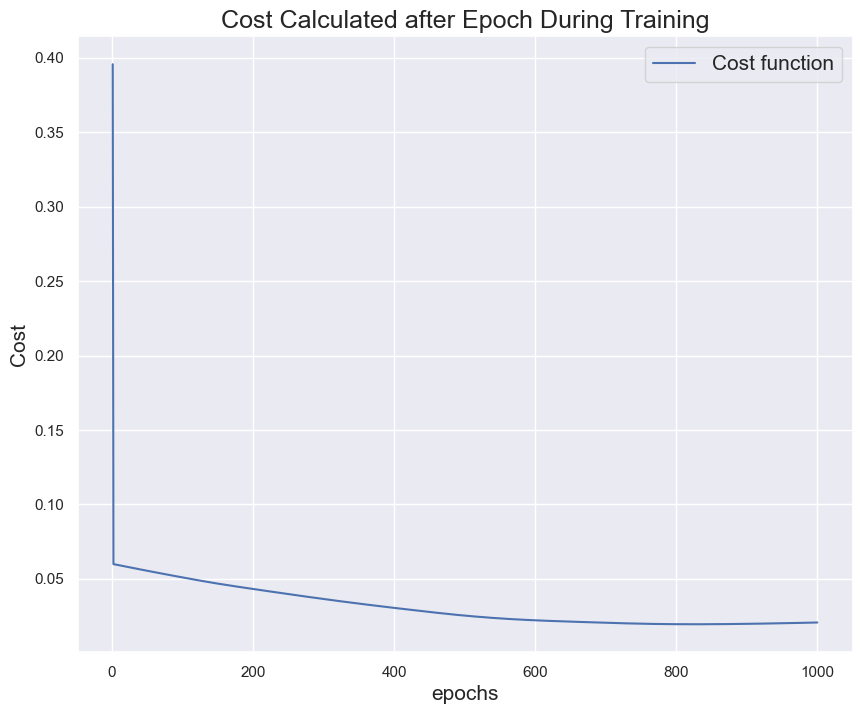

In [262]:
model.plot_cost_function()


This looks good! When I was initializing playing with this dataset, I had to mess with learning rate quite a bit. This heart attack dataset is not as simple as the iris dataset, so I ended up having to set the learning rate to 0.0005, instead of say, 0.01, so that the model actually learns. If I had kept it at 0.01, then this cost graph would've still decreased overall, but it would have a crazy number of oscillations. 

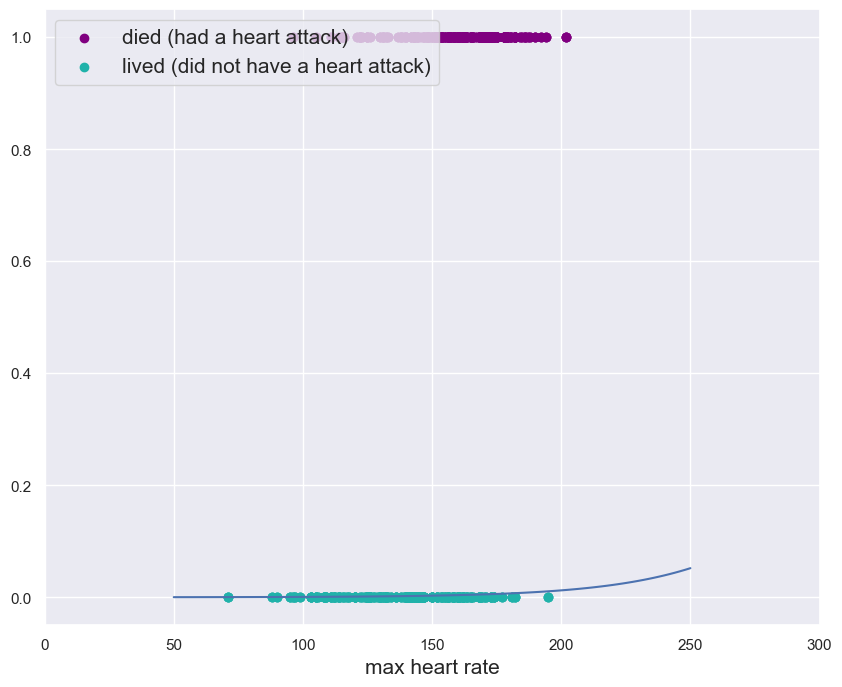

In [263]:
plt.figure(figsize = (10, 8))
plt.xlim((0,300 ))
plt.scatter(die.thalach, 
            np.ones(526), 
            color = "purple", 
            label = "died (had a heart attack)")
plt.scatter(live.thalach, 
            np.zeros(499), 
            color = "lightseagreen", 
            label = "lived (did not have a heart attack)")

domain = np.linspace(50, 250, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)))
plt.xlabel("max heart rate", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

So it's not looking great for us. We see that the Sigmoid function does not map well to this dataset! Let's see why by printing the predictions

In [264]:
y_pred = model.predict(X_test)

model.predict(X)

array([0.00480298, 0.00327282, 0.00134829, ..., 0.00109605, 0.00368304,
       0.0009453 ])

We notice that many of the predicted probabilities truly are closer to 0! Next we calculate the error.

In [265]:
np.rint(model.predict(X)) != y

array([False, False, False, ..., False,  True, False])

In [266]:

classification_error = (np.rint(model.predict(X)) != y).astype(int)
print(f"Classification Error: {sum(classification_error)/ len(y)}")

mse = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", mse)

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Accuracy:", accuracy)



Classification Error: 0.5131707317073171
Test MSE: 0.4798583261355134
Accuracy: 0.5162337662337663


So basically everyone is predicted to not get a heart attack (which is great news in my opinion, but definitely not accurate). See decision boundary here:

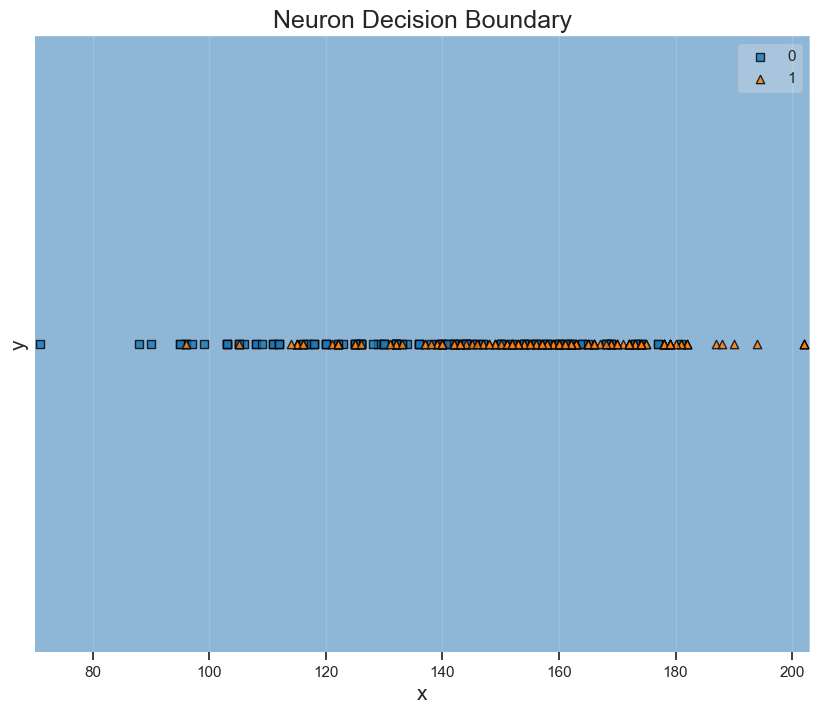

In [267]:
model.plot_decision_boundary(X_test, y_test)
plt.show()

So this is interesting! The error is definitely pretty high- more than 50% incorrect! There may be a few reasons for this. 

Sometimes, the data is imbalanced. This means that one class is more prevalent than the other. So in our scenario, a lack of heart attacks may be much more prevalent than heart attacks- but this probably isn't the case! We saw that both categories are fairly balanced at around 500, so this isn't the reason.

A more probable reason is that maximum heart rate may serve as a weak predictor for whether or not someone is likely to get a heart attack. Indeed, a quick google search shows that there are many other types of factors that may affect one's risk of getting a heart attack. Another big reason for the struggle is that the two classes have a very large overlap between them. When we graphed the learned logistic curve, notice that the two rows of datapoints are almost directly facing each other. As such, it makes it difficult for the logistic regression model to separate them effectively. 

So, let's try some move onto more complex models to see what we can do once we face instances like these!
